<h1 style="color:#27469c"> Preprocessing of ESB Cooling Towers 1 and 2 data </h1>


<h1 style="color:#27469c">ESB Cooling Tower 1</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import preprocessor
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

rootpath = ".."

In [2]:
# load cooling tower data
df = pd.read_csv(f'{rootpath}/data/esb/2422_1.csv', index_col='time')
df.index = pd.to_datetime(df.index, utc='True')
df = df.drop(columns=['Setpoint_Python', 'Setpoint_Existing'])
df.drop(columns=df.filter(like='generated', axis=1).columns, inplace=True)

initial_data_size = df.shape[0]
df.columns

Index(['PerFreqFanB', 'PowFanB', 'RunFanB', 'PerFreqFanA', 'PowFanA',
       'RunFanA', 'PerHumidity', 'TempWetBulb', 'FlowCond', 'FlowEvap',
       'PowChi', 'PressDiffCond', 'PressDiffEvap', 'RunChi', 'TempCondIn',
       'TempCondOut', 'TempEvapIn', 'TempEvapOut', 'TempAmbient',
       'PerFreqChiP', 'PowChiP', 'PerFreqConP', 'PowConP', 'RunConP',
       'Tonnage'],
      dtype='object')

<h3 style="color:#27469c">Missing data removal</h3>

In [3]:
# drop columns with no data (FlowCond)
df = df.dropna(axis=1, how="all")

# replace 0.0 in enviroment columns with null
env_cols = ["TempWetBulb", "TempCondIn", "TempEvapOut", "TempEvapIn", "TempAmbient", "PerHumidity"]
df[env_cols] = df[env_cols].replace(0.0, np.nan)

print(df.isna().sum() / df.shape[0])

df = df.dropna()
print(f"After missing data removal, we are left with {df.shape[0]} rows out of {initial_data_size}.")

PerFreqFanB      0.009555
PowFanB          0.009555
RunFanB          0.000000
PerFreqFanA      0.009555
PowFanA          0.009555
RunFanA          0.000000
PerHumidity      0.013203
TempWetBulb      0.013203
FlowEvap         0.009555
PowChi           0.009555
PressDiffCond    0.009555
PressDiffEvap    0.009555
RunChi           0.000000
TempCondIn       0.013232
TempCondOut      0.009555
TempEvapIn       0.013232
TempEvapOut      0.013232
TempAmbient      0.013203
PerFreqChiP      0.009555
PowChiP          0.028264
PerFreqConP      0.009555
PowConP          0.028264
RunConP          0.000000
Tonnage          0.010126
dtype: float64
After missing data removal, we are left with 101954 rows out of 104976.


# Iterate through the columns and create a separate figure for each
for column in df.columns[1:]:
    plt.figure()  # Create a new figure
    plt.plot(df.index, df[column])
    plt.title(f'Trendline for {column}')
    plt.xlabel('Year')
    plt.ylabel(column)

plt.show()

<h3 style="color:#27469c">Add efficiency and season columns + additional features</h3>

In [4]:
preprocessor.create_season_col(datadf=df, season_col_name="Season")
df["DayOfWeek"] = df.index.weekday
df['HourOfDay'] = df.index.hour


# columns modified/dropped to align with kissam
df["PerFreqFan"] = df["PerFreqFanA"]/2.0 + df["PerFreqFanB"]/2.0
df.drop(columns=['PerFreqFanA', 'PerFreqFanB', 'PressDiffCond', 'PressDiffEvap', 'RunChi', 'RunFanB', 'RunFanA', 'PerFreqChiP', 'RunConP'], inplace=True)

<h3 style="color:#27469c">Target</h3>

Since the three power variables are in the same range, we can conclude that they are using the same units and combine them into a single energy consumption variable.

In [5]:
df['EnergyConsumption'] = df["PowFanA"] + df["PowFanB"] + df["PowConP"] + df["PowChi"] + df["PowChiP"]
df.drop(columns=["PowFanA", "PowFanB", "PowConP", "PowChi", "PowChiP"], inplace=True)

In [6]:
df.columns

Index(['PerHumidity', 'TempWetBulb', 'FlowEvap', 'TempCondIn', 'TempCondOut',
       'TempEvapIn', 'TempEvapOut', 'TempAmbient', 'PerFreqConP', 'Tonnage',
       'Season', 'DayOfWeek', 'HourOfDay', 'PerFreqFan', 'EnergyConsumption'],
      dtype='object')

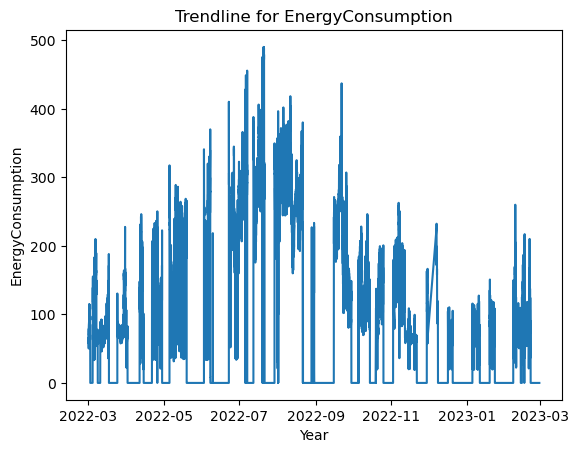

In [7]:
column = "EnergyConsumption"
plt.figure()  # Create a new figure
plt.plot(df.index, df[column])
plt.title(f'Trendline for {column}')
plt.xlabel('Year')
plt.ylabel(column)

plt.show()

In [8]:
# save preprocessed tower 1 data
df.sort_index(axis=1).to_csv(f'{rootpath}/data/esb/esb1_preprocessed.csv')

<h1 style="color:#27469c">ESB Cooling Tower 2</h1>

Replicate the same steps as for cooling tower 1

In [9]:
# load cooling tower data
df = pd.read_csv(f'{rootpath}/data/esb/2841_2.csv', index_col='time')
df.index = pd.to_datetime(df.index, utc='True')
df.drop(columns=df.filter(like='generated', axis=1).columns, inplace=True)
initial_data_size = df.shape[0]

In [10]:
# missing data removal
df = df.dropna(axis=1, how="all")
env_cols = ["TempWetBulb", "TempCondIn", "TempEvapOut", "TempEvapIn", "TempAmbient", "PerHumidity"]
df[env_cols] = df[env_cols].replace(0.0, np.nan)
df[["FlowEvap"]] = df[["FlowEvap"]].applymap(lambda x: np.nan if x < 0.0 else x)
print(df.isna().sum() / df.shape[0])
df = df.dropna()
print(f"After missing data removal, we are left with {df.shape[0]} rows out of {initial_data_size}.")

FlowEvap         0.010393
PerHumidity      0.013193
PowChi           0.009555
PressDiffCond    0.009555
PressDiffEvap    0.009555
RunChi           0.000000
TempAmbient      0.013193
TempCondIn       0.013222
TempCondOut      0.009555
TempEvapIn       0.013222
TempEvapOut      0.013222
TempWetBulb      0.013193
PerFreqFanB      0.009555
PowFanA          0.009555
RunFanB          0.000000
PerFreqFanA      0.009555
PowFanB          0.009555
RunFanA          0.000000
PerFreqChiP      0.009555
PowChiP          0.028264
PerFreqConP      0.009555
PowConP          0.028264
RunConP          0.000000
Tonnage          0.010193
dtype: float64
After missing data removal, we are left with 101860 rows out of 104976.


In [11]:
preprocessor.create_season_col(datadf=df, season_col_name="Season")
df["DayOfWeek"] = df.index.weekday
df['HourOfDay'] = df.index.hour


# columns modified/dropped to align with kissam
df["PerFreqFan"] = df["PerFreqFanA"]/2.0 + df["PerFreqFanB"]/2.0
df.drop(columns=['PerFreqFanA', 'PerFreqFanB', 'PressDiffCond', 'PressDiffEvap', 'RunChi', 'RunFanB', 'RunFanA', 'PerFreqChiP', 'RunConP'], inplace=True)

In [12]:
# target
df['EnergyConsumption'] = df["PowFanA"] + df["PowFanB"] + df["PowConP"] + df["PowChi"] + df["PowChiP"]
df.drop(columns=["PowFanA", "PowFanB", "PowConP", "PowChi", "PowChiP"], inplace=True)

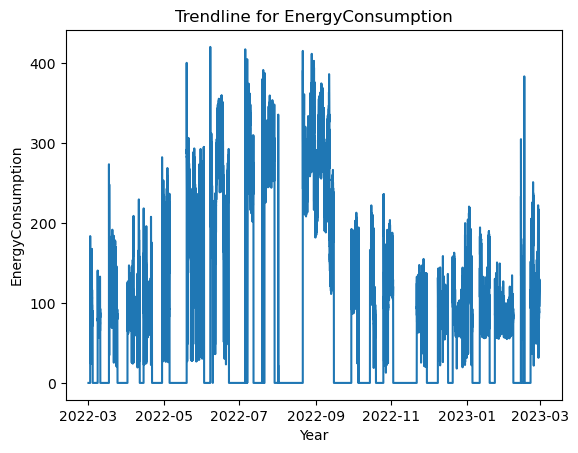

In [13]:
column = "EnergyConsumption"
plt.figure()  # Create a new figure
plt.plot(df.index, df[column])
plt.title(f'Trendline for {column}')
plt.xlabel('Year')
plt.ylabel(column)

plt.show()

In [14]:
# save preprocessed tower 2 data
df.sort_index(axis=1).to_csv(f'{rootpath}/data/esb/esb2_preprocessed.csv')

In [15]:
df.columns

Index(['FlowEvap', 'PerHumidity', 'TempAmbient', 'TempCondIn', 'TempCondOut',
       'TempEvapIn', 'TempEvapOut', 'TempWetBulb', 'PerFreqConP', 'Tonnage',
       'Season', 'DayOfWeek', 'HourOfDay', 'PerFreqFan', 'EnergyConsumption'],
      dtype='object')